In [13]:
#!/usr/bin/env python3
# !conda install requests
# !pip install fmpsdk
# !pip install requests

import os
import typing

from dotenv import load_dotenv

import fmpsdk

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import fmpkit as fmp

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Actual API key is stored in a .env file.  Not good to store API key directly in script.
load_dotenv()
apikey = os.environ.get("apikey")

In [15]:
# Company Valuation Methods
symbol: str = "AAPL"
symbols: typing.List[str] = ["AAPL", "GOOG","CSCO", "DKS", "HD","RY"]
exchange: str = "NYSE"
exchanges: typing.List[str] = ["NYSE", "NASDAQ"]
query: str = "AA"
limit: int = 3
period: str = "quarter"
download: bool = True
market_cap_more_than: int = 1000000000
beta_more_than: int = 1
volume_more_than: int = 10000
sector: str = "Technology"
dividend_more_than: int = 0
industry: str = "Software"
filing_type: str = "10-K"

In [18]:
df_symbols = fmpsdk.symbols_list(apikey=apikey)
df_symbols = pd.DataFrame(df_symbols)
symbols = df_symbols[df_symbols['exchangeShortName']=='NYSE']['symbol'].to_list()[:20]
symbols

['KMI',
 'GE',
 'BAC',
 'HPQ',
 'CX',
 'F',
 'SNAP',
 'WFC',
 'AIG',
 'T',
 'C',
 'VALE',
 'MS',
 'JPM',
 'ORCL',
 'NKE',
 'PG',
 'BBD',
 'PFE',
 'NOK']

In [35]:
df_income = fmp.income_statement (apikey, symbols)
df_balance = fmp.balance_sheet(apikey, symbols)
df_cashflow = fmp.cashflow_statement(apikey, symbols)
df_keymetrics = fmp.keymetrics (apikey, symbols)

In [36]:
df_moat_perShare = fmp.moat_per_share (df_balance, df_income, df_cashflow)
df_moat_perShare.loc['AIG']

,EV+Div,Earnings,Sales,Cash
date,,,,
2011-12-31,63.535225,9.890753,35.697961,0.019450
2012-12-31,58.479992,2.037663,38.851923,2.178723
2013-12-31,68.043841,6.133512,47.039347,3.959609
2014-12-31,73.613852,5.201189,44.632543,3.458939
2015-12-31,66.829784,1.645603,44.156276,2.155920
2016-12-31,69.184336,-0.778124,48.350031,2.184064
2017-12-31,69.351692,-6.537990,53.655789,-9.225615
2018-12-31,61.716795,-0.006592,52.168826,0.067023
2019-12-31,75.923319,3.834476,57.026956,-1.062842


In [187]:
df_gr.loc[symbol].isnull().sum()

EV+Div      0
Earnings    0
Sales       0
Cash        0
dtype: int64

timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year       True
weighted    False
Name: EV+Div, dtype: bool
False
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div, dtype: bool
True
timeframe
10 year     False
5 year      False
2 year      False
weighted    False
Name: EV+Div,

                    EV+Div    Earnings     Sales       Cash
symbol timeframe                                           
AIG    10 year    0.018826   -0.738797  0.090737  -0.251577
       5 year     0.018826   -1.235921  0.094049  -3.115662
       2 year     0.230189 -582.652515  0.093123 -16.857969
       weighted    0.08928 -194.875744  0.092637  -6.741736
BAC    10 year     0.02997    0.385359  0.041461  -0.373667
...                    ...         ...       ...        ...
VALE   weighted  -0.026461    -0.85871  0.040066   0.042328
WFC    10 year    0.061565     0.03815  0.036838  -0.078857
       5 year     0.046971    0.003395  0.045841   0.100995
       2 year     0.038837   -0.045532  0.076307  -0.796023
       weighted   0.049124   -0.001329  0.052995  -0.257961

[80 rows x 4 columns]


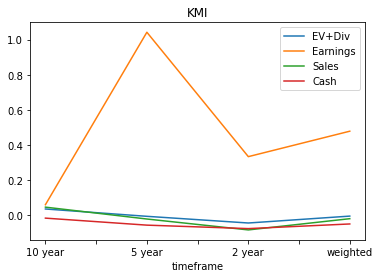

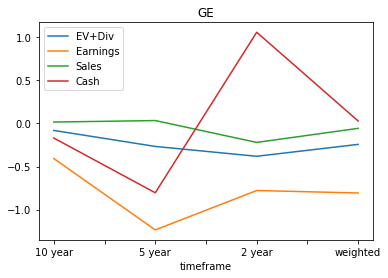

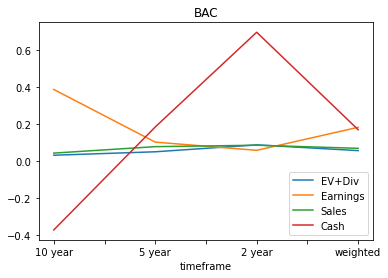

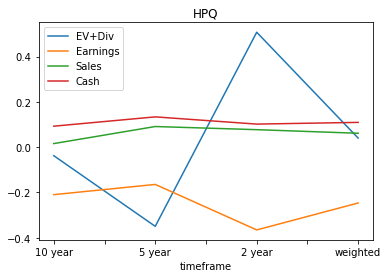

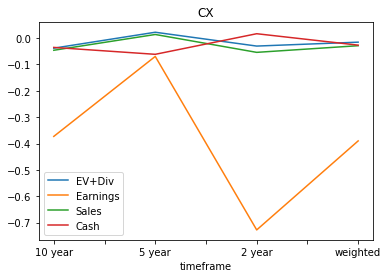

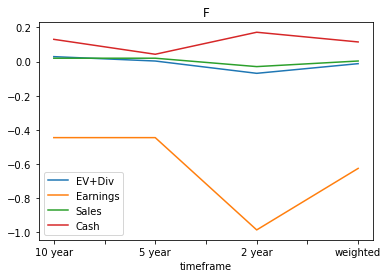

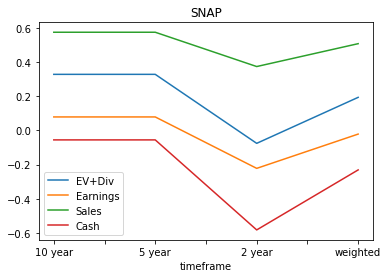

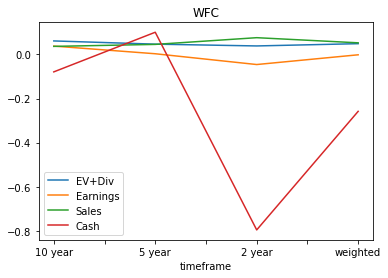

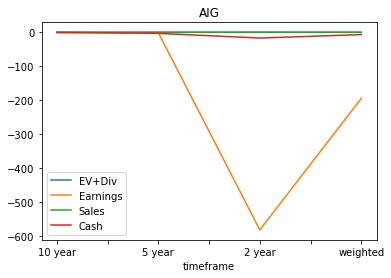

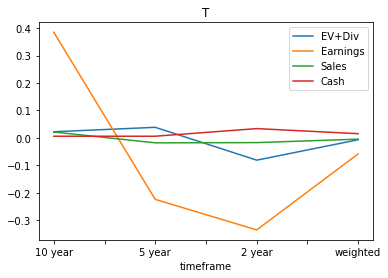

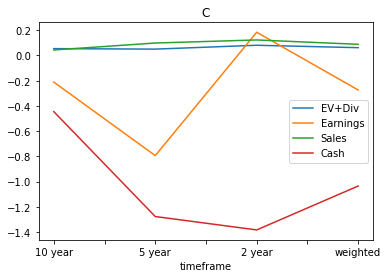

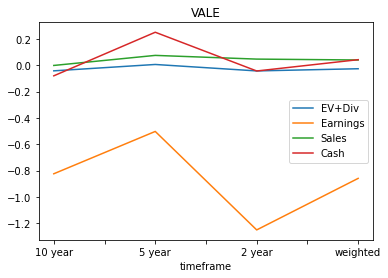

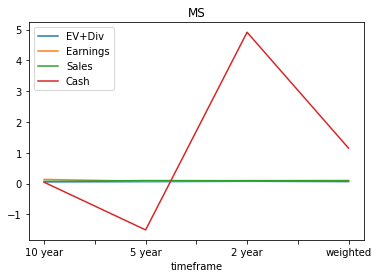

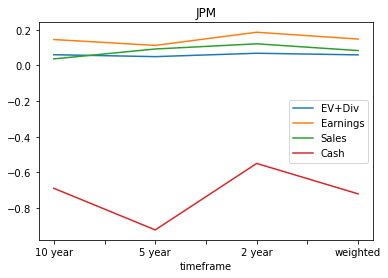

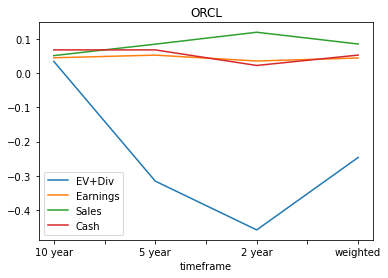

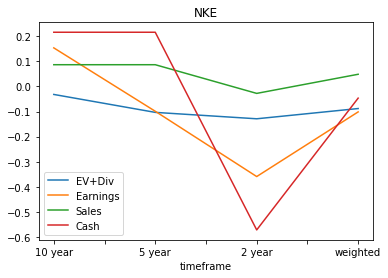

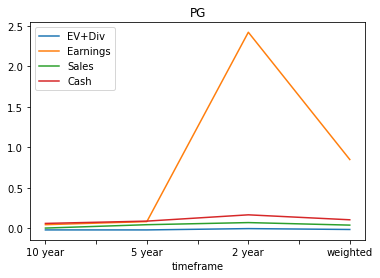

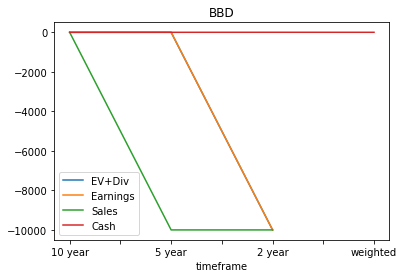

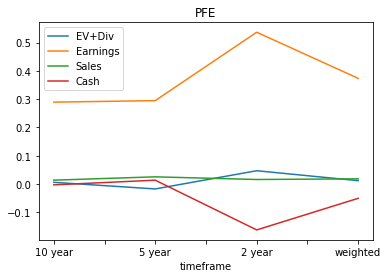

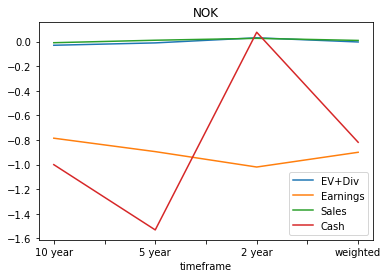

In [281]:
df_gr = fmp.growth_rates (df_moat_perShare)
for symbol in symbols:
    df_gr.loc[symbol].plot(title=symbol)
print (df_gr)

In [282]:
df_gr.index.droplevel(1).drop_duplicates()

Index(['AIG', 'BAC', 'BBD', 'C', 'CX', 'F', 'GE', 'HPQ', 'JPM', 'KMI', 'MS',
       'NKE', 'NOK', 'ORCL', 'PFE', 'PG', 'SNAP', 'T', 'VALE', 'WFC'],
      dtype='object', name='symbol')

In [295]:
df_windage_gr = pd.DataFrame(index=df_gr.index.droplevel(1).drop_duplicates(),columns=['Windage Growth Rate'])
for symbol in symbols:
    print (symbol)
    if df_gr.groupby(level=0).tail(1).loc[symbol].isnull().sum().sum()>0:
        print ("is NaN")
        df_windage_gr.loc[symbol]['Windage Growth Rate']=np.nan
    else:
        df_windage_gr.loc[symbol]['Windage Growth Rate']=df_gr.groupby(level=0).tail(1).loc[symbol].median(axis=1)[0]
        
print (df_windage_gr)
df_gr.groupby(level=0).tail(1).loc[symbol].median(axis=1)[0]

KMI
GE
BAC
HPQ
CX
F
SNAP
WFC
AIG
T
C
VALE
MS
JPM
ORCL
NKE
PG
BBD
is NaN
PFE
NOK
       Windage Growth Rate
symbol                    
AIG              -3.326228
BAC               0.117579
BBD                    NaN
C                 -0.10584
CX               -0.027998
F                -0.004399
GE               -0.149781
HPQ               0.050835
JPM               0.070877
KMI              -0.014463
MS                0.095167
NKE              -0.067348
NOK               -0.41118
ORCL              0.049222
PFE               0.015087
PG                0.074578
SNAP              0.086358
T                -0.005654
VALE              0.006802
WFC               0.023898


-0.4111799781201081

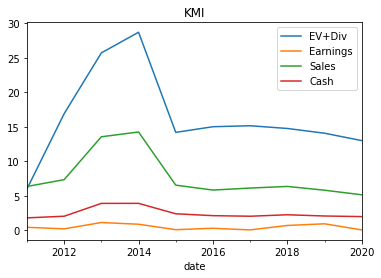

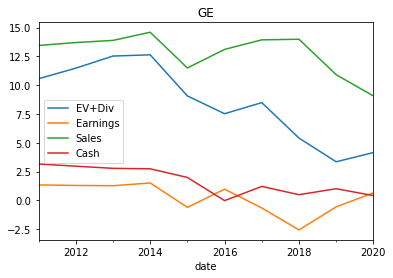

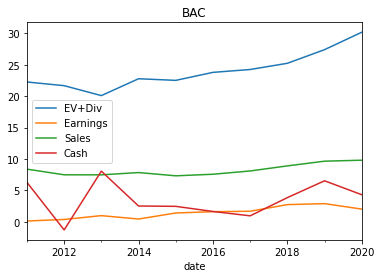

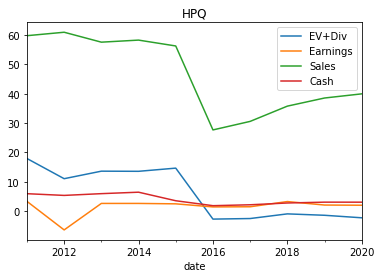

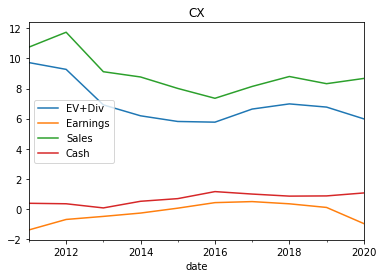

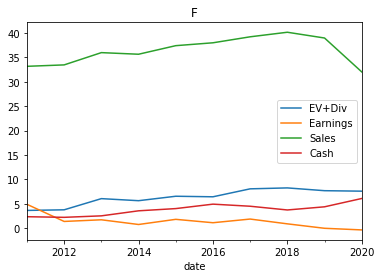

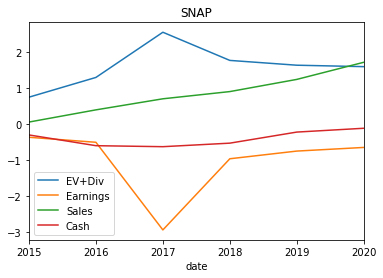

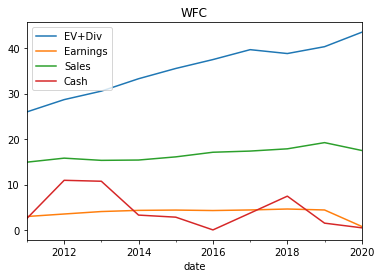

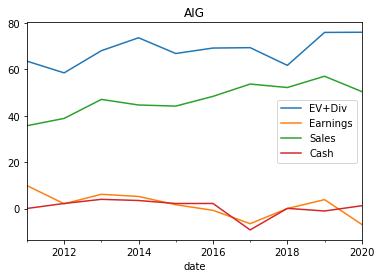

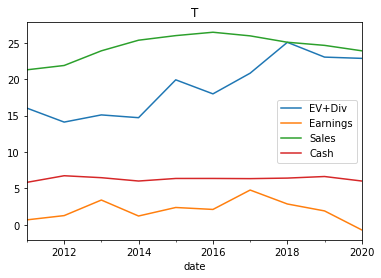

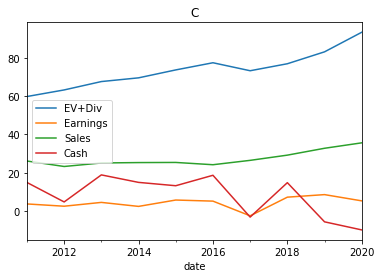

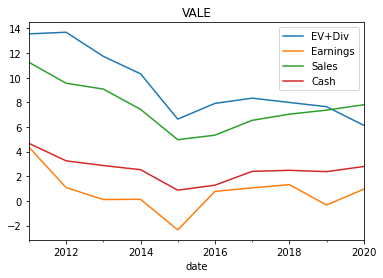

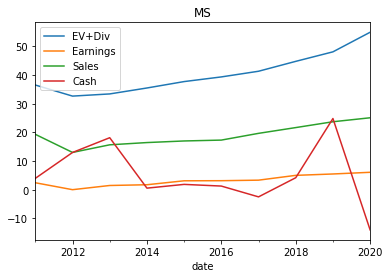

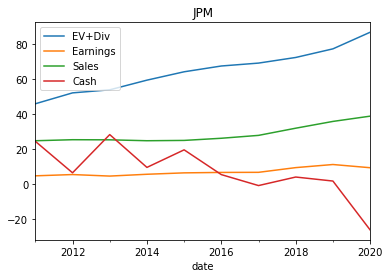

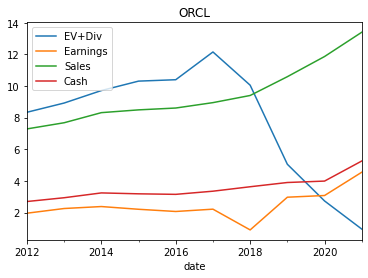

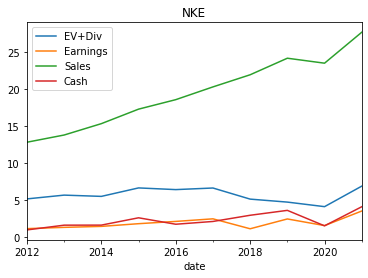

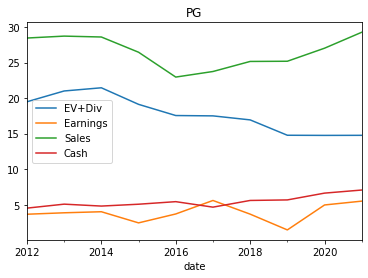

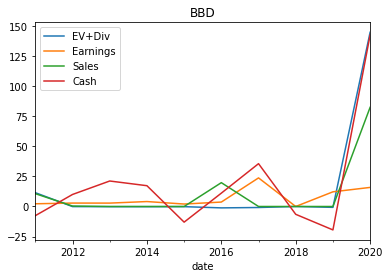

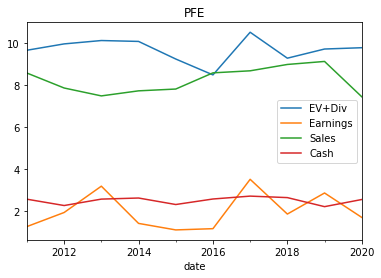

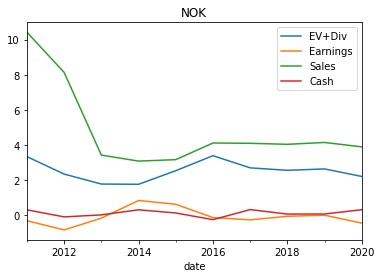

In [38]:
for symbol in symbols:
    df_moat_perShare.loc[symbol].plot(title=symbol)

In [39]:
df_moat_pct_chg = df_moat_perShare.copy()
df_moat_pct_chg = df_moat_pct_chg.groupby('symbol').pct_change()
df_moat_pct_chg

EV+Div  Earnings     Sales        Cash
symbol date                                                
AIG    2011-12-31       NaN       NaN       NaN         NaN
       2012-12-31 -0.079566 -0.793983  0.088351  111.014919
       2013-12-31  0.163541  2.010071  0.210734    0.817399
       2014-12-31  0.081859 -0.152005 -0.051166   -0.126444
       2015-12-31 -0.092157 -0.683610 -0.010671   -0.376711
...                     ...       ...       ...         ...
WFC    2016-12-31  0.055106 -0.022718  0.063194   -0.988332
       2017-12-31  0.058079  0.029508  0.015026  111.790328
       2018-12-31 -0.021490  0.046792  0.028488    0.998013
       2019-12-31  0.038837 -0.045532  0.076307   -0.796023
       2020-12-31  0.078735 -0.819248 -0.089670   -0.673779

[196 rows x 4 columns]

In [40]:
df_moat_rolling5_pct_chg = df_moat_pct_chg.groupby('symbol').rolling(5,min_periods=1).median().reset_index(0,drop=True)
df_moat_rolling5_pct_chg['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg.median(axis=1)
df_moat_rolling5_pct_chg

,EV+Div,Earnings,Sales,Cash,Windage_Growth_Rate
0,NaN,NaN,NaN,NaN,NaN
1,-0.079566,-0.793983,0.088351,111.014919,0.004393
2,0.041987,0.608044,0.149543,55.916159,0.378793
3,0.081859,-0.152005,0.088351,0.817399,0.085105
4,0.001147,-0.417807,0.038840,0.345477,0.019993
...,...,...,...,...,...
191,0.067846,0.063153,0.045188,-0.138745,0.054171
192,0.065051,0.029508,0.015026,-0.138745,0.022267
193,0.058079,0.029508,0.028488,-0.138745,0.028998
194,0.055106,0.014772,0.045188,-0.138745,0.029980


In [114]:
mgt_col_limits = (0.1,0.1,3)
mgt_columns = ("ROIC","ROE","LTD-to-FCF")

# df_mgt = pd.DataFrame(index=df_balance.index,columns=mgt_columns)
# df_mgt["ROIC"]=df_keymetrics["roic"]#(df_income['operatingIncome']*(1+df_income['incomeTaxExpense']/df_income['incomeBeforeTax']))/( (df_balance['longTermDebt'] + df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
# df_mgt["ROE"]=df_keymetrics["roe"]#df_income['netIncome']/df_balance['totalStockholdersEquity']
# df_mgt["LTD-to-FCF"]=df_balance['longTermDebt']/df_cashflow['freeCashFlow']
df_mgt = fmp.mgt_per_share(df_keymetrics,df_balance,df_cashflow)
df_mgt

ROIC       ROE   LTD-to-FCF
symbol date                                   
AIG    2011-12-31   0.0  0.155674  2150.085714
       2012-12-31   0.0  0.034844    13.193689
       2013-12-31   0.0  0.089878     7.108781
       2014-12-31   0.0  0.070186     6.234671
       2015-12-31   0.0  0.024343    10.201599
...                 ...       ...          ...
WFC    2016-12-31   0.0  0.109418  1509.289941
       2017-12-31   0.0  0.106609    12.016932
       2018-12-31   0.0  0.113632     6.348460
       2019-12-31   0.0  0.103993    33.901783
       2020-12-31   0.0  0.017755   103.813749

[196 rows x 3 columns]

In [70]:
df_income.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [113]:
print(df_mgt['ROIC']['GE'])
print (ROIC['GE'])

date
2011-12-31    0.114083
2012-12-31    0.113790
2013-12-31    0.110700
2014-12-31    0.119894
2015-12-31    0.042910
2016-12-31    0.050426
2017-12-31    0.029320
2018-12-31    0.041643
2019-12-31    0.028495
2020-12-31    0.008190
Name: ROIC, dtype: float64
date
2011-12-31    0.088000
2012-12-31    0.096573
2013-12-31    0.098178
2014-12-31    0.105848
2015-12-31    0.027060
2016-12-31    0.067879
2017-12-31    0.054379
2018-12-31    0.058035
2019-12-31    0.038809
2020-12-31    0.018629
dtype: float64


In [102]:
df_income['incomeTaxExpense']['KMI']

date
2011-12-31    3.628000e+08
2012-12-31    1.390000e+08
2013-12-31    7.420000e+08
2014-12-31    6.480000e+08
2015-12-31    5.640000e+08
2016-12-31    9.170000e+08
2017-12-31    1.938000e+09
2018-12-31    5.870000e+08
2019-12-31    9.260000e+08
2020-12-31   -4.810000e+08
Name: incomeTaxExpense, dtype: float64

In [111]:
ROIC = ((df_income['operatingIncome']-df_income['incomeTaxExpense'])/ (df_balance['longTermDebt']+df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
ROE = df_income['netIncome']/df_balance['totalStockholdersEquity']

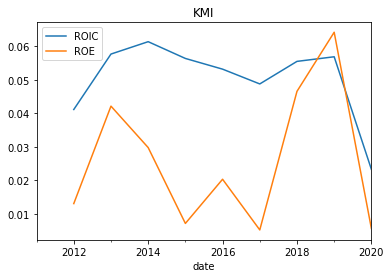

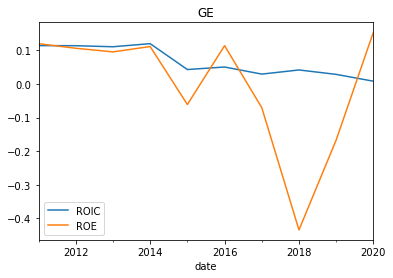

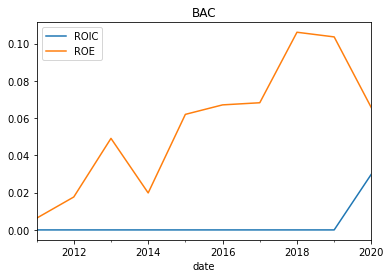

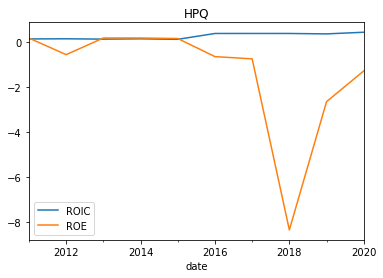

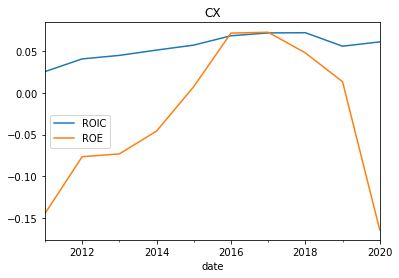

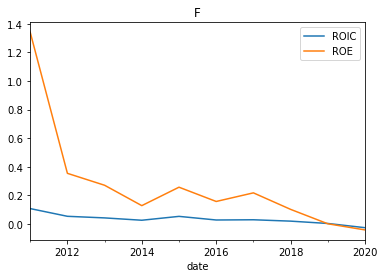

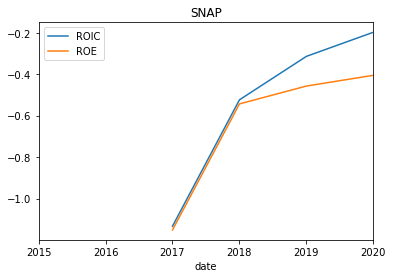

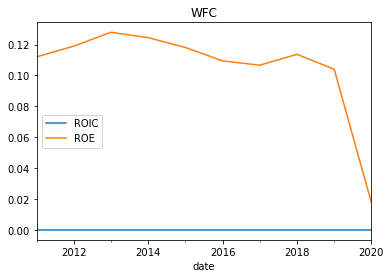

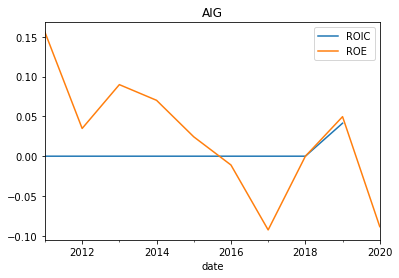

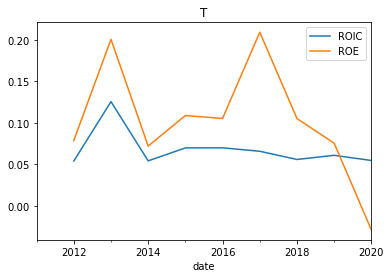

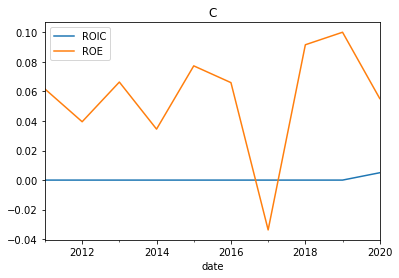

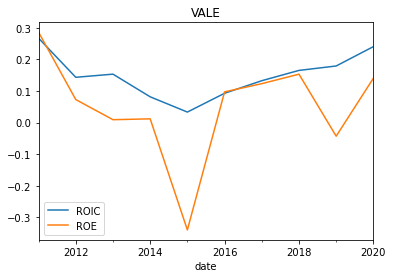

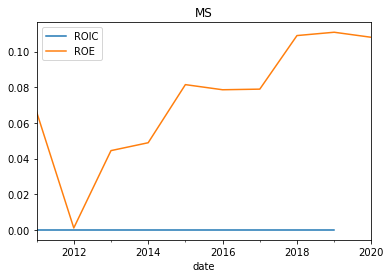

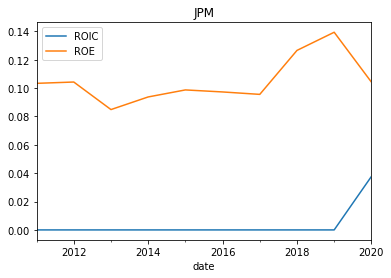

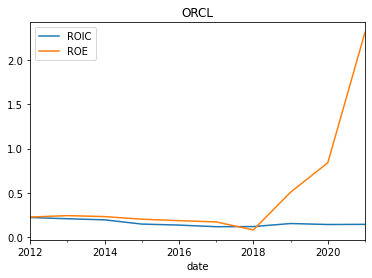

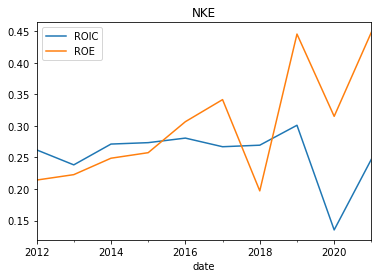

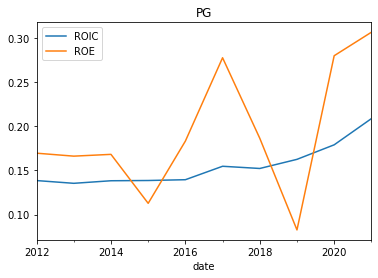

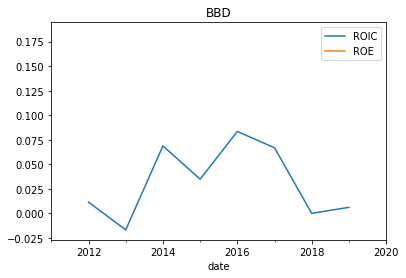

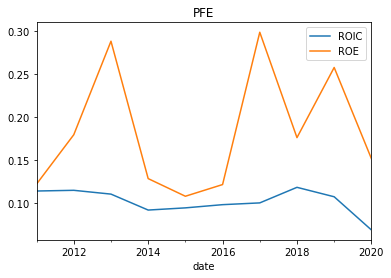

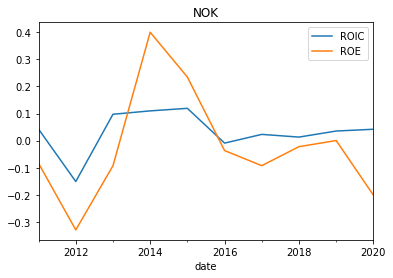

In [115]:
for symbol in symbols:
    df_mgt.loc[symbol][['ROIC','ROE']].plot(title=symbol)

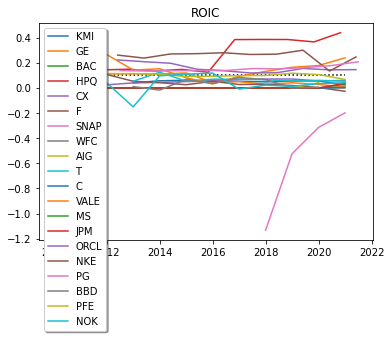

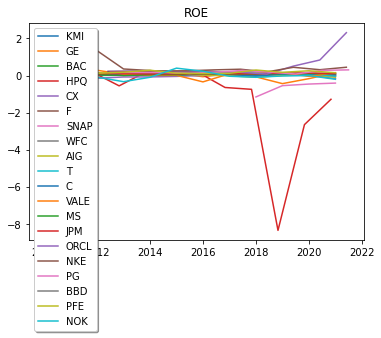

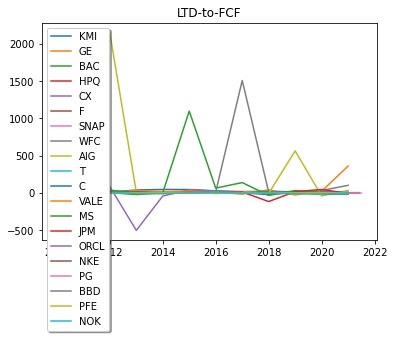

In [116]:
fig = []
ax = []

for column in mgt_columns:
  idx = mgt_columns.index(column)
  fig.append(idx)
  ax.append(idx)
  fig[idx], ax[idx] = plt.subplots()
  for symbol in symbols:
    ax[idx].plot(df_mgt.loc[symbol][column],label=symbol)
  plt.hlines(mgt_col_limits[idx], xmin=datetime.datetime(2010,1,1), xmax=datetime.datetime(2020,12,31), linestyle = 'dotted',colors='k')
  legend = ax[idx].legend(loc='best', shadow=True)
  plt.title(column)
plt.show()

In [117]:
REVENUE = 'revenue'
CHG_FIX_ASSETS_INT = 'investmentsInPropertyPlantAndEquipment'
NET_CASH_OPS = 'netCashProvidedByOperatingActivities'
SHARES_DILUTED = 'weightedAverageShsOutDil'
FCF = 'freeCashFlow'
PE = 'peRatio'
EPS = 'netIncomePerShare'

In [171]:
for symbol in symbols:
    print (df_gr.loc[symbol])

             EV+Div  Earnings     Sales      Cash
timeframe                                        
10 year    0.033522  0.057929  0.044050 -0.018665
5 year    -0.008317  1.042112 -0.023677 -0.058657
2 year    -0.046451  0.332237 -0.085906 -0.078458
weighted  -0.007082  0.477426 -0.021844 -0.051927
             EV+Div  Earnings     Sales      Cash
timeframe                                        
10 year   -0.080934 -0.406668  0.016203 -0.168980
5 year    -0.266600 -1.235167  0.033601 -0.804259
2 year    -0.380911 -0.778118 -0.220046  1.058130
weighted  -0.242815 -0.806651 -0.056747  0.028297
             EV+Div  Earnings     Sales      Cash
timeframe                                        
10 year    0.029970  0.385359  0.041461 -0.373667
5 year     0.048598  0.100848  0.076287  0.182721
2 year     0.085955  0.056469  0.084049  0.694622
weighted   0.054841  0.180892  0.067265  0.167892
             EV+Div  Earnings     Sales      Cash
timeframe                                        


In [300]:
computed_columns = ['Sales','Sales_1y_change','PPE', 'PPE_1y_change','Cash_Ops','Shares_Diluted','PPE/Sales','PPE/Sales_10y_mean','Growth_Capex','Maint_Capex','Owner_Earnings','Owner_Earnings_per_share','10Cap'
                    ,'FCF', 'FCF_per_share','Windage_Growth_Rate','Payback_Time'
                    ,'Default_PE','PE','PE_10y_mean','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']
target_ROR = 0.15
df_computed = pd.DataFrame(index=df_income.index,columns=computed_columns)

# for 10 Cap calculation
df_computed['Sales'] = df_income[REVENUE]
df_computed['Sales_1y_change']= df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['PPE'] = -df_cashflow[CHG_FIX_ASSETS_INT]
df_computed['PPE_1y_change'] = df_computed.groupby('symbol')['PPE'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['Cash_Ops'] = df_cashflow[NET_CASH_OPS]
df_computed['Shares_Diluted'] = df_income[SHARES_DILUTED]
df_computed['PPE/Sales'] = df_computed['PPE']/df_computed['Sales']
df_computed['PPE/Sales_10y_mean'] = df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#df.apply(df=df_computed['PPE/Sales'],func=rolling10)#df_computed['PPE/Sales'].rolling(window=10,min_periods=1).mean()
# for symbol in symbols:
# # #  df_computed.loc[ticker,'PPE/Sales_10y_mean'] = df_computed.loc[ticker]['PPE/Sales'].rolling(window=10,min_periods=1).mean()#df_computed.loc[ticker][-10:]['PPE/Sales'].mean()
#   df_computed.loc[symbol,'Windage_Growth_Rate'] = df_moat_perShare.loc[symbol,10]['EV+Div']
for symbol in symbols:
    df_computed.loc[symbol,'Windage_Growth_Rate'] = df_windage_gr.loc[symbol]['Windage Growth Rate']#df_moat_rolling5_pct_chg['Windage_Growth_Rate'].to_numpy()
df_computed['Growth_Capex'] = df_computed['Sales_1y_change'] * df_computed['PPE/Sales_10y_mean']
df_computed['Maint_Capex'] = df_computed['PPE'] - df_computed['Growth_Capex']
df_computed['Owner_Earnings'] = df_computed['Cash_Ops'] - df_computed['Maint_Capex']
df_computed['Owner_Earnings_per_share'] = df_computed['Owner_Earnings']/df_computed['Shares_Diluted']
df_computed['10Cap']=10*df_computed['Owner_Earnings_per_share']

# # for payback time calculation
df_computed['FCF'] = df_cashflow[FCF]
df_computed['FCF_per_share'] = df_computed['FCF']/df_computed['Shares_Diluted']
df_computed['Payback_Time'] = np.zeros(len(df_computed['Payback_Time']))
for i in range(8):
    df_computed['Payback_Time']=df_computed['Payback_Time']+df_computed['FCF_per_share']*((1+df_computed['Windage_Growth_Rate'])**i)

# # for MOS calculation
df_computed['Default_PE']=2*df_computed['Windage_Growth_Rate']*100
df_computed['PE']=df_keymetrics[PE]
df_computed['PE_10y_mean']=df_computed.groupby('symbol')['PE'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#sf.apply(df=df_computed['PE'],func=rolling_40)
df_computed['PE_10y_est'] = df_computed[['Default_PE','PE_10y_mean']].min(axis=1)
df_computed['EPS'] = df_keymetrics[EPS]
df_computed['EPS_10y_est'] = df_computed['EPS']*((1+df_computed['Windage_Growth_Rate'])**10)
df_computed['Price_10y_est'] = df_computed['EPS_10y_est']*df_computed['PE_10y_est']
df_computed['Sticker_Price'] = df_computed['Price_10y_est']/((1+target_ROR)**10)
df_computed['MOS50'] = df_computed['Sticker_Price']*0.5
df_computed['MOS30'] = df_computed['Sticker_Price']*0.7

df_computed[['Default_PE','PE','PE_10y_mean','PE_10y_est','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']]
# df_computed[['PPE','Growth_Capex','Maint_Capex','Windage_Growth_Rate','FCF','Payback_Time']]
df_computed[['Windage_Growth_Rate']]

Windage_Growth_Rate
symbol date                          
AIG    2011-12-31           -3.326228
       2012-12-31           -3.326228
       2013-12-31           -3.326228
       2014-12-31           -3.326228
       2015-12-31           -3.326228
...                               ...
WFC    2016-12-31            0.023898
       2017-12-31            0.023898
       2018-12-31            0.023898
       2019-12-31            0.023898
       2020-12-31            0.023898

[196 rows x 1 columns]

In [301]:
MOS_columns = ['CurrentPrice','10Cap','Payback','MOS30','MOS50']
df_MOS = pd.DataFrame(index=symbols,columns=MOS_columns)
# ytickers = dict.fromkeys(tickers)
for symbol in symbols:
#   ytickers[ticker] = yf.Ticker(ticker)
  df_MOS.loc[symbol]['CurrentPrice'] = fmpsdk.quote(apikey=apikey, symbol=symbol)[0]['price']#ytickers[ticker].info['currentPrice']
  df_MOS.loc[symbol]['10Cap'] = df_computed.loc[symbol].iloc[-1]['10Cap']
  df_MOS.loc[symbol]['Payback'] = df_computed.loc[symbol].iloc[-1]['Payback_Time']
  df_MOS.loc[symbol]['MOS30'] = df_computed.loc[symbol].iloc[-1]['MOS30']
  df_MOS.loc[symbol]['MOS50'] = df_computed.loc[symbol].iloc[-1]['MOS50']

df_MOS['Buy'] = np.where((df_MOS['CurrentPrice']<df_MOS['MOS30'])|(df_MOS['CurrentPrice']<df_MOS['10Cap'])|(df_MOS['CurrentPrice']<df_MOS['Payback']),True, False)

df_MOS

,CurrentPrice,10Cap,Payback,MOS30,MOS50,Buy
KMI,17.74,24.889854,18.886946,-0.034413,-0.024581,True
GE,104.08,-0.904573,0.107251,-0.666024,-0.475732,False
BAC,43.78,43.247581,52.725416,22.040812,15.743437,True
HPQ,27.68,26.048717,25.252053,4.100854,2.929181,False
CX,6.66,6.747976,4.789845,0.727471,0.519622,True
F,15.09,61.084823,36.736403,0.046898,0.033498,True
SNAP,73.53,-0.868793,-1.68828,7.587503,5.419645,False
WFC,47.28,4.961057,4.317157,0.839521,0.599658,False
AIG,57.89,11.940512,-307.455514,3651982.499881,2608558.928487,True
T,26.03,37.460435,29.979441,0.133705,0.095503,True


In [149]:
df_Historical_sp500_constituent = fmpsdk.historical_sp500_constituent(apikey=apikey)


df_Historical_sp500_constituent = pd.DataFrame(df_Historical_sp500_constituent)

df_Historical_sp500_constituent['date']= pd.to_datetime(df_Historical_sp500_constituent['date'])
# df_Historical_sp500_constituent.set_index(['symbol','date'],inplace=True)
df_Historical_sp500_constituent.sort_values(by=['date','symbol'],inplace=True)

# len(df_Historical_sp500_constituent['addedSecurity']=='')
# df_Historical_sp500_constituent
df_sp500_historical=df_Historical_sp500_constituent.copy()#.drop(columns=['dateAdded','reason','removedSecurity'])
df_sp500_historical['Added'] = (df_sp500_historical['addedSecurity']!='')
df_sp500_historical['Removed'] = (df_sp500_historical['removedTicker']!='')
df_sp500_historical=df_sp500_historical[['date','symbol','Added','Removed']]
# df_sp500.sort_values(by=['date'],inplace=True)
df_sp500_historical

,date,symbol,Added,Removed
544,1999-12-07,LDW,False,True
545,1999-12-07,YHOO,True,False
543,2000-07-27,JDSU,True,False
542,2000-07-27,RAD,False,True
541,2000-12-05,ABK,True,False
...,...,...,...,...
4,2021-09-20,CDAY,True,False
2,2021-09-20,MTCH,True,False
5,2021-09-20,NOV,False,True
1,2021-09-20,PRGO,False,True


In [154]:
df_sp500a['symbol'].tolist()

['STT',
 'ED',
 'MCK',
 'GLW',
 'FITB',
 'HBAN',
 'MET',
 'NTRS',
 'GE',
 'WY',
 'ROK',
 'MCO',
 'WHR',
 'ETN',
 'NI',
 'FCX',
 'SPGI',
 'PPL',
 'RTX',
 'MAR',
 'MSI',
 'TXN',
 'MS',
 'TROW',
 'DRI',
 'BEN',
 'HSY',
 'HIG',
 'HAL',
 'BA',
 'IP',
 'IBM',
 'BMY',
 'F',
 'KMB',
 'EXC',
 'ETR',
 'CPB',
 'EIX',
 'DTE',
 'DE',
 'CAT',
 'CVS',
 'COP',
 'CL',
 'KO',
 'GD',
 'XOM',
 'KR',
 'AEP',
 'XEL',
 'UNP',
 'SO',
 'SEE',
 'MO',
 'PEG',
 'PG',
 'PPG',
 'PFE',
 'PEP',
 'NSC',
 'CVX',
 'MRK',
 'WAT',
 'L',
 'HUM',
 'HWM',
 'HON',
 'ABT',
 'SHW',
 'EMR',
 'CMI',
 'SLB',
 'ES',
 'CSX',
 'WM',
 'USB',
 'AMD',
 'DHR',
 'CLX',
 'GIS',
 'NEM',
 'MCD',
 'LLY',
 'PAYX',
 'SBUX',
 'BAX',
 'BDX',
 'JNJ',
 'GPC',
 'HPQ',
 'KLAC',
 'WMB',
 'JPM',
 'IFF',
 'DUK',
 'NEE',
 'BAC',
 'TAP',
 'AXP',
 'DIS',
 'CI',
 'WFC',
 'LNC',
 'MMM',
 'INTC',
 'TGT',
 'TXT',
 'VFC',
 'WBA',
 'VLO',
 'AIG',
 'PCAR',
 'FDX',
 'ADP',
 'MAS',
 'GWW',
 'ADM',
 'VNO',
 'WMT',
 'SWK',
 'SNA',
 'BF-B',
 'AAPL',
 'OXY',
 'D',
 'CA

In [151]:
df_sp500_constituent = fmpsdk.sp500_constituent(apikey=apikey)


df_sp500_constituent = pd.DataFrame(df_sp500_constituent)

# df_sp500_constituent['date']= pd.to_datetime(df_sp500_constituent['date'])
# df_sp500_constituent.set_index(['symbol','date'],inplace=True)
# df_sp500_constituent.sort_values(by=['date','symbol'],inplace=True)
df_sp500a = df_sp500_constituent.copy()
df_sp500a['founded']=df_sp500a['founded'].astype(str).str[0:4]+'-01-01'
df_sp500a['date'] = df_sp500a['dateFirstAdded'].astype(str).str[0:10]#.replace(to_replace='',value='1980-01-01'))
df_sp500a.loc[df_sp500a.date=='','date']=df_sp500a[df_sp500a['date']=='']['founded']
# df_sp500a[df_sp500a['date']=='']['abc']=df_sp500a[df_sp500a['date']=='']['founded']
df_sp500a['date'] = pd.to_datetime(df_sp500a['date'])
df_sp500a['Added'] = True
df_sp500a['Removed'] = False
df_sp500a=df_sp500a[['date','symbol','Added','Removed']]
df_sp500a.sort_values(by=['date'],inplace=True)

df_sp500_changes=pd.concat([df_sp500_historical,df_sp500a]).sort_values(by=['date','symbol']).drop_duplicates()
df_sp500_changes

,date,symbol,Added,Removed
425,1792-01-01,STT,True,False
125,1823-01-01,ED,True,False
310,1833-01-01,MCK,True,False
129,1851-01-01,GLW,True,False
194,1858-01-01,FITB,True,False
...,...,...,...,...
4,2021-09-20,CDAY,True,False
2,2021-09-20,MTCH,True,False
5,2021-09-20,NOV,False,True
1,2021-09-20,PRGO,False,True


In [165]:
def sp500 (df, df_changes, date):
    i = 0
    df_changes.sort_values(by=['date'], ascending=False,inplace=True)
    sp500_list = df['symbol'].tolist()
    while df_changes.iloc[i].loc['date'] >= datetime.datetime.strptime(date, '%Y-%m-%d'):
        print (df_changes.iloc[i])
        if df_changes.iloc[i].loc['Removed']==True:
            sp500_list.append(df_changes.iloc[i].loc['symbol'])
            print (df_changes.iloc[i].loc['symbol'],'Added')
        if df_changes.iloc[i].loc['Added']==True:
            if df_changes.iloc[i].loc['symbol'] not in sp500_list:
                print (df_changes.iloc[i].loc['symbol'],'not in list')
            else:
                sp500_list.remove(df_changes.iloc[i].loc['symbol'])
                print (df_changes.iloc[i].loc['symbol'], "Removed")
        i+=1
    return sp500_list
sp500_list = sp500 (df_sp500a, df_sp500_changes, '2000-01-01')
len(sp500_list)

date       2021-09-20 00:00:00
symbol                     UNM
Added                    False
Removed                   True
Name: 3, dtype: object
UNM Added
date       2021-09-20 00:00:00
symbol                    CDAY
Added                     True
Removed                  False
Name: 4, dtype: object
CDAY Removed
date       2021-09-20 00:00:00
symbol                     NOV
Added                    False
Removed                   True
Name: 5, dtype: object
NOV Added
date       2021-09-20 00:00:00
symbol                    PRGO
Added                    False
Removed                   True
Name: 1, dtype: object
PRGO Added
date       2021-09-20 00:00:00
symbol                    MTCH
Added                     True
Removed                  False
Name: 2, dtype: object
MTCH Removed
date       2021-09-20 00:00:00
symbol                     BRO
Added                     True
Removed                  False
Name: 0, dtype: object
BRO Removed
date       2021-08-30 00:00:00
symbol            

HWM Removed
date       2020-04-01 00:00:00
symbol                    ARNC
Added                    False
Removed                   True
Name: 59, dtype: object
ARNC Added
date       2020-03-03 00:00:00
symbol                      IR
Added                     True
Removed                  False
Name: 249, dtype: object
IR Removed
date       2020-03-02 00:00:00
symbol                     XEC
Added                    False
Removed                   True
Name: 60, dtype: object
XEC Added
date       2020-03-02 00:00:00
symbol                      IR
Added                     True
Removed                  False
Name: 61, dtype: object
IR not in list
date       2020-01-28 00:00:00
symbol                     WCG
Added                    False
Removed                   True
Name: 63, dtype: object
WCG Added
date       2020-01-28 00:00:00
symbol                    PAYC
Added                     True
Removed                  False
Name: 62, dtype: object
PAYC Removed
date       2019-12-23 00:00:0

JKHY Removed
date       2018-11-13 00:00:00
symbol                     EQT
Added                    False
Removed                   True
Name: 115, dtype: object
EQT Added
date       2018-11-06 00:00:00
symbol                    KEYS
Added                     True
Removed                  False
Name: 117, dtype: object
KEYS Removed
date       2018-11-06 00:00:00
symbol                      CA
Added                    False
Removed                   True
Name: 116, dtype: object
CA Added
date       2018-10-11 00:00:00
symbol                    FTNT
Added                     True
Removed                  False
Name: 118, dtype: object
FTNT Removed
date       2018-10-11 00:00:00
symbol                    EVHC
Added                    False
Removed                   True
Name: 119, dtype: object
EVHC Added
date       2018-10-01 00:00:00
symbol                     ROL
Added                     True
Removed                  False
Name: 121, dtype: object
ROL Removed
date       2018-10-01 00:

ANSS Removed
date       2017-06-19 00:00:00
symbol                    ALGN
Added                     True
Removed                  False
Name: 180, dtype: object
ALGN Removed
date       2017-06-19 00:00:00
symbol                     MJN
Added                    False
Removed                   True
Name: 176, dtype: object
MJN Added
date       2017-06-19 00:00:00
symbol                     HLT
Added                     True
Removed                  False
Name: 178, dtype: object
HLT Removed
date       2017-06-02 00:00:00
symbol                    TGNA
Added                    False
Removed                   True
Name: 183, dtype: object
TGNA Added
date       2017-06-02 00:00:00
symbol                    INFO
Added                     True
Removed                  False
Name: 182, dtype: object
INFO Removed
date       2017-04-05 00:00:00
symbol                      IT
Added                     True
Removed                  False
Name: 184, dtype: object
IT Removed
date       2017-04-05 0

UA Removed
date       2016-04-04 00:00:00
symbol                      FL
Added                     True
Removed                  False
Name: 246, dtype: object
FL Removed
date       2016-04-04 00:00:00
symbol                     CAM
Added                    False
Removed                   True
Name: 245, dtype: object
CAM Added
date       2016-03-30 00:00:00
symbol                     POM
Added                    False
Removed                   True
Name: 247, dtype: object
POM Added
date       2016-03-30 00:00:00
symbol                    HOLX
Added                     True
Removed                  False
Name: 248, dtype: object
HOLX Removed
date       2016-03-30 00:00:00
symbol                     ESV
Added                    False
Removed                   True
Name: 249, dtype: object
ESV Added
date       2016-03-30 00:00:00
symbol                     CNC
Added                     True
Removed                  False
Name: 250, dtype: object
CNC Removed
date       2016-03-07 00:00:0

date       2015-03-23 00:00:00
symbol                    EQIX
Added                     True
Removed                  False
Name: 303, dtype: object
EQIX Removed
date       2015-03-23 00:00:00
symbol                     HBI
Added                     True
Removed                  False
Name: 310, dtype: object
HBI Removed
date       2015-03-20 00:00:00
symbol                     HBI
Added                     True
Removed                  False
Name: 223, dtype: object
HBI not in list
date       2015-03-20 00:00:00
symbol                    EQIX
Added                     True
Removed                  False
Name: 175, dtype: object
EQIX not in list
date       2015-03-18 00:00:00
symbol                    HSIC
Added                     True
Removed                  False
Name: 312, dtype: object
HSIC Removed
date       2015-03-18 00:00:00
symbol                     CFN
Added                    False
Removed                   True
Name: 311, dtype: object
CFN Added
date       2015-03-17 00:

LXK Added
date       2012-10-01 00:00:00
symbol                      DV
Added                    False
Removed                   True
Name: 397, dtype: object
DV Added
date       2012-10-01 00:00:00
symbol                     ADT
Added                     True
Removed                  False
Name: 399, dtype: object
ADT Removed
date       2012-10-01 00:00:00
symbol                     PNR
Added                     True
Removed                  False
Name: 400, dtype: object
PNR Removed
date       2012-09-05 00:00:00
symbol                    SHLD
Added                    False
Removed                   True
Name: 401, dtype: object
SHLD Added
date       2012-09-05 00:00:00
symbol                     LYB
Added                     True
Removed                  False
Name: 402, dtype: object
LYB Removed
date       2012-07-31 00:00:00
symbol                      GR
Added                    False
Removed                   True
Name: 403, dtype: object
GR Added
date       2012-07-31 00:00:00


MPC Removed
date       2011-06-30 00:00:00
symbol                     RSH
Added                    False
Removed                   True
Name: 442, dtype: object
RSH Added
date       2011-06-30 00:00:00
symbol                     MPC
Added                     True
Removed                  False
Name: 443, dtype: object
MPC not in list
date       2011-06-01 00:00:00
symbol                     MEE
Added                    False
Removed                   True
Name: 444, dtype: object
MEE Added
date       2011-06-01 00:00:00
symbol                     ANR
Added                     True
Removed                  False
Name: 445, dtype: object
ANR Removed
date       2011-04-28 00:00:00
symbol                     CMG
Added                     True
Removed                  False
Name: 105, dtype: object
CMG Removed
date       2011-04-27 00:00:00
symbol                     CMG
Added                     True
Removed                  False
Name: 447, dtype: object
CMG not in list
date       2011-04

PCLN not in list
date       2009-09-28 00:00:00
symbol                     CBE
Added                    False
Removed                   True
Name: 490, dtype: object
CBE Added
date       2009-09-28 00:00:00
symbol                     ARG
Added                     True
Removed                  False
Name: 491, dtype: object
ARG Removed
date       2009-08-19 00:00:00
symbol                     FMC
Added                     True
Removed                  False
Name: 199, dtype: object
FMC Removed
date       2009-07-01 00:00:00
symbol                     WDC
Added                     True
Removed                  False
Name: 489, dtype: object
WDC Removed
date       2009-07-01 00:00:00
symbol                     PWR
Added                     True
Removed                  False
Name: 391, dtype: object
PWR Removed
date       2009-03-27 00:00:00
symbol                    ORLY
Added                     True
Removed                  False
Name: 352, dtype: object
ORLY Removed
date       2009-03

Name: 516, dtype: object
MXIM Added
date       2007-09-26 00:00:00
symbol                     FDC
Added                    False
Removed                   True
Name: 518, dtype: object
FDC Added
date       2007-09-26 00:00:00
symbol                     ICE
Added                     True
Removed                  False
Name: 519, dtype: object
ICE Removed
date       2007-09-07 00:00:00
symbol                    MCHP
Added                     True
Removed                  False
Name: 316, dtype: object
MCHP Removed
date       2007-08-24 00:00:00
symbol                     LUK
Added                     True
Removed                  False
Name: 521, dtype: object
LUK not in list
date       2007-08-24 00:00:00
symbol                     KSE
Added                    False
Removed                   True
Name: 520, dtype: object
KSE Added
date       2007-07-12 00:00:00
symbol                    AKAM
Added                     True
Removed                  False
Name: 13, dtype: object
AKAM Remov

date       2001-11-30 00:00:00
symbol                    NVDA
Added                     True
Removed                  False
Name: 349, dtype: object
NVDA Removed
date       2001-08-30 00:00:00
symbol                     ABC
Added                     True
Removed                  False
Name: 34, dtype: object
ABC Removed
date       2001-08-07 00:00:00
symbol                     ZBH
Added                     True
Removed                  False
Name: 502, dtype: object
ZBH Removed
date       2001-06-22 00:00:00
symbol                    ZION
Added                     True
Removed                  False
Name: 503, dtype: object
ZION Removed
date       2001-04-02 00:00:00
symbol                    FISV
Added                     True
Removed                  False
Name: 197, dtype: object
FISV Removed
date       2001-03-01 00:00:00
symbol                    CTAS
Added                     True
Removed                  False
Name: 110, dtype: object
CTAS Removed
date       2000-12-12 00:00:00


412

In [23]:

print(f"Multiple Company Quotes: {fmpsdk.quote(apikey=apikey, symbol=symbols)=}")
print(f"Key Executives: {fmpsdk.key_executives(apikey=apikey, symbol=symbol)=}")
print(f"Search: {fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
print(f"Ticker Search: {fmpsdk.search_ticker(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
fmpsdk.financial_statement(apikey=apikey, symbol=symbol)
print(f"Annual Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=}")
fmpsdk.income_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=}")
print(f"Quarterly Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Financial Statement Symbols List: {fmpsdk.financial_statement_symbol_lists(apikey=apikey)=}")
print(f"Income Statement Growth: {fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Balance Sheet Statement Growth: {fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Cash Flow Statement Growth: {fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Annual Income Statement as Reported : {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement as Reported: {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement as Reported : {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement as Reported: {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement as Reported : {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Cash Flow Statement as Reported: {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Full Financial Statement as Reported : {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Full Financial Statement as Reported: {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Financial Ratios (TTM): {fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Key Metrics (TTM): {fmpsdk.key_metrics_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Company Rating: {fmpsdk.rating(apikey=apikey, symbol=symbol)=}")
print(f"Historical Company Rating: {fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Discounted Cash Flow: {fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Annual Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Daily Historical Discounted Cash Flow: {fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Market Capitalization: {fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=}")
print(f"Historical Market Capitalization: {fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Symbols List: {fmpsdk.symbols_list(apikey=apikey)=}")
print(f"Stock Screener (Sector Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Industry Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, industry=industry, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Multiple Exchanges Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, exchange=exchanges)=}")
print(f"Delisted Companies: {fmpsdk.delisted_companies(apikey=apikey, limit=limit)=}")
print(f"Stock News (Single): {fmpsdk.stock_news(apikey=apikey, tickers=symbol)=}")
print(f"Stock News (Multiple): {fmpsdk.stock_news(apikey=apikey, tickers=symbols)=}")
print(f"Stock News (Latest): {fmpsdk.stock_news(apikey=apikey, limit=limit)=}")
print(f"Earnings Surprises: {fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=}")
print(f"SEC Filings: {fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=}")
print(f"Press Releases: {fmpsdk.press_releases(apikey=apikey, symbol=symbol)=}")


Multiple Company Quotes: fmpsdk.quote(apikey=apikey, symbol=symbols)=[{'symbol': 'AIG', 'name': 'American International Group, Inc.', 'price': 57.61, 'changesPercentage': 0.716783, 'change': 0.41, 'dayLow': 57.1, 'dayHigh': 57.98, 'yearHigh': 58.11, 'yearLow': 29.12, 'marketCap': 49268187136.0, 'priceAvg50': 54.84343, 'priceAvg200': 50.470787, 'volume': 2217169, 'avgVolume': 4477515, 'exchange': 'NYSE', 'open': 57.11, 'previousClose': 57.2, 'eps': 4.793, 'pe': 12.019611, 'earningsAnnouncement': '2021-08-05T16:16:00.000+0000', 'sharesOutstanding': 855201999, 'timestamp': 1633728799}, {'symbol': 'BAC', 'name': 'Bank of America Corporation', 'price': 44.34, 'changesPercentage': 0.498643, 'change': 0.220001, 'dayLow': 43.925, 'dayHigh': 44.81, 'yearHigh': 44.87, 'yearLow': 23.12, 'marketCap': 374131621888.0, 'priceAvg50': 41.56057, 'priceAvg200': 40.595, 'volume': 38946183, 'avgVolume': 48745375, 'exchange': 'NYSE', 'open': 44.07, 'previousClose': 44.12, 'eps': 2.996, 'pe': 14.799733, 'ear

Key Executives: fmpsdk.key_executives(apikey=apikey, symbol=symbol)=[{'title': 'Head of Sub-Region, Lower Gulf, Afghanistan & Pakistan - Networks Bus.', 'name': 'Qais  Esrawee', 'pay': None, 'currencyPay': 'USD', 'gender': '', 'yearBorn': None, 'titleSince': None}, {'title': 'Executive Officer', 'name': 'Ms. Maria  Varsellona J.D., L.L.B.', 'pay': None, 'currencyPay': 'USD', 'gender': 'female', 'yearBorn': None, 'titleSince': None}, {'title': 'Head of Belarussian office', 'name': 'Mr. Sergei  Khraby', 'pay': None, 'currencyPay': 'USD', 'gender': 'male', 'yearBorn': None, 'titleSince': None}, {'title': 'Chief People Officer', 'name': 'Ms. Stephanie  Werner-Dietz', 'pay': None, 'currencyPay': 'USD', 'gender': 'female', 'yearBorn': None, 'titleSince': None}, {'title': 'Head of Media Relations', 'name': 'Katja  Antila', 'pay': None, 'currencyPay': 'USD', 'gender': '', 'yearBorn': None, 'titleSince': None}, {'title': 'Chief Legal Officer', 'name': 'Mr. Nassib  Abou-Khalil', 'pay': None, 'cu

Quarterly Income Statement: fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=[{'date': '2021-06-30', 'symbol': 'NOK', 'reportedCurrency': 'EUR', 'fillingDate': '2021-06-30', 'acceptedDate': '2021-06-30', 'period': 'Q2', 'revenue': 5313000000, 'costOfRevenue': 3133000000, 'grossProfit': 2179000000, 'grossProfitRatio': 0.4101261057782797, 'researchAndDevelopmentExpenses': 1063000000, 'generalAndAdministrativeExpenses': 0.0, 'sellingAndMarketingExpenses': 0.0, 'sellingGeneralAndAdministrativeExpenses': 712000000, 'otherExpenses': -80000000, 'operatingExpenses': 1695000000, 'costAndExpenses': 4828000000, 'interestExpense': 0.0, 'depreciationAndAmortization': 273000000, 'ebitda': 683000000, 'ebitdaratio': 0.12855260681347638, 'operatingIncome': 484000000, 'operatingIncomeRatio': 0.07829851308112178, 'totalOtherIncomeExpensesNet': 68000000, 'incomeBeforeTax': 416000000, 'incomeBeforeTaxRatio': 0.07829851308112178, 'incomeTaxExpense': 66000000, 'netIncome': 344000000, '

Annual Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=[{'date': '2020-12-31', 'symbol': 'NOK', 'reportedCurrency': 'EUR', 'fillingDate': '2020-12-31', 'acceptedDate': '2020-12-31', 'period': 'FY', 'cashAndCashEquivalents': 6940000000, 'shortTermInvestments': 1335000000, 'cashAndShortTermInvestments': 8275000000, 'netReceivables': 6871000000, 'inventory': 2242000000, 'otherCurrentAssets': 827000000, 'totalCurrentAssets': 18215000000, 'propertyPlantEquipmentNet': 2588000000, 'goodwill': 5074000000, 'intangibleAssets': 1953000000, 'goodwillAndIntangibleAssets': 7027000000, 'longTermInvestments': 1284000000, 'taxAssets': 1822000000, 'otherNonCurrentAssets': 5255000000, 'totalNonCurrentAssets': 17976000000, 'otherAssets': 0.0, 'totalAssets': 36191000000, 'accountPayables': 3174000000, 'shortTermDebt': 750000000, 'taxPayables': 525000000, 'deferredRevenue': 2549000000, 'otherCurrentLiabilities': 5288000000, 'totalCurrentLiabilities': 11761000000, 'longT

Quarterly Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'NOK', 'reportedCurrency': 'EUR', 'fillingDate': '2021-06-30', 'acceptedDate': '2021-06-30', 'period': 'Q2', 'cashAndCashEquivalents': 7252000000, 'shortTermInvestments': 1682000000, 'cashAndShortTermInvestments': 8934000000, 'netReceivables': 5992000000, 'inventory': 2392000000, 'otherCurrentAssets': 881000000, 'totalCurrentAssets': 18199000000, 'propertyPlantEquipmentNet': 2706000000, 'goodwill': 5270000000, 'intangibleAssets': 1768000000, 'goodwillAndIntangibleAssets': 7038000000, 'longTermInvestments': 1314000000, 'taxAssets': 1502000000, 'otherNonCurrentAssets': 5907000000, 'totalNonCurrentAssets': 18467000000, 'otherAssets': 0.0, 'totalAssets': 36666000000, 'accountPayables': 3119000000, 'shortTermDebt': 782000000, 'taxPayables': 155000000, 'deferredRevenue': 2544000000, 'otherCurrentLiabilities': 5084000000, 'totalCurrentLiabilities': 1

Annual Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=[{'date': '2020-12-31', 'symbol': 'NOK', 'reportedCurrency': 'EUR', 'fillingDate': '2020-12-31', 'acceptedDate': '2020-12-31', 'period': 'FY', 'netIncome': -2516000000, 'depreciationAndAmortization': 1132000000, 'deferredIncomeTax': 3254000000, 'stockBasedCompensation': 76000000, 'changeInWorkingCapital': -710000000, 'accountsReceivables': 0.0, 'inventory': 553000000, 'accountsPayables': 0.0, 'otherWorkingCapital': 0.0, 'otherNonCashItems': 649000000, 'netCashProvidedByOperatingActivities': 1759000000, 'investmentsInPropertyPlantAndEquipment': -479000000, 'acquisitionsNet': -93000000, 'purchasesOfInvestments': -1213000000, 'salesMaturitiesOfInvestments': 245000000, 'otherInvestingActivites': 23000000, 'netCashUsedForInvestingActivites': -1517000000, 'debtRepayment': -480000000, 'commonStockIssued': 0.0, 'commonStockRepurchased': 0.0, 'dividendsPaid': -148000000, 'otherFinancingActivites': 1511000000,

Quarterly Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'NOK', 'reportedCurrency': 'EUR', 'fillingDate': '2021-06-30', 'acceptedDate': '2021-06-30', 'period': 'Q2', 'netIncome': 344000000, 'depreciationAndAmortization': 273000000, 'deferredIncomeTax': 67000000, 'stockBasedCompensation': 0.0, 'changeInWorkingCapital': -664000000, 'accountsReceivables': 0.0, 'inventory': -136000000, 'accountsPayables': 0.0, 'otherWorkingCapital': 0.0, 'otherNonCashItems': 217000000, 'netCashProvidedByOperatingActivities': 106000000, 'investmentsInPropertyPlantAndEquipment': -113000000, 'acquisitionsNet': -33000000, 'purchasesOfInvestments': -247000000, 'salesMaturitiesOfInvestments': 342000000, 'otherInvestingActivites': 25000000, 'netCashUsedForInvestingActivites': -26000000, 'debtRepayment': -153000000, 'commonStockIssued': 0.0, 'commonStockRepurchased': 0.0, 'dividendsPaid': -3000000.0, 'otherFinancingActivites': 21000000

Financial Statement Symbols List: fmpsdk.financial_statement_symbol_lists(apikey=apikey)=['000012.SZ', '000020.KS', '000028.SZ', '000031.SZ', '000039.SZ', '000046.SZ', '000060.SZ', '0001.HK', '000250.KS', '0002.HK', '0003.HK', '000400.KS', '000400.SZ', '000415.SZ', '0004.HK', '000519.SZ', '000528.SZ', '000559.SZ', '000563.SZ', '0005.HK', '000636.SZ', '000681.SZ', '0006.HK', '000718.SZ', '000732.SZ', '000758.SZ', '0007.HK', '000826.SZ', '000869.SZ', '000877.SZ', '000898.SZ', '0008.HK', '000930.SZ', '000933.SZ', '000960.SZ', '000970.SZ', '0009.HK', '0010.HK', '0010.KL', '001130.KS', '0011.HK', '0012.HK', '001470.KS', '0014.HK', '001530.KS', '0016.HK', '0017.HK', '0018.HK', '0019.HK', '002004.SZ', '002048.SZ', '002145.SZ', '002155.SZ', '002174.SZ', '0021.HK', '002203.SZ', '002221.SZ', '002230.SZ', '002244.SZ', '002249.SZ', '002250.SZ', '002281.SZ', '0022.HK', '0023.HK', '0024.HK', '002595.SZ', '0025.HK', '002630.KS', '002653.SZ', '0026.HK', '0027.HK', '002810.KS', '0028.HK', '002967.SZ', 

Income Statement Growth: fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-12-31', 'symbol': 'NOK', 'period': 'FY', 'growthRevenue': -0.06274930302380442, 'growthCostOfRevenue': -0.08873173660684502, 'growthGrossProfit': -0.015974057170309874, 'growthGrossProfitRatio': 0.04990686697209559, 'growthResearchAndDevelopmentExpenses': -0.07345273180684651, 'growthGeneralAndAdministrativeExpenses': 0, 'growthSellingAndMarketingExpenses': -0.0654627539503386, 'growthOtherExpenses': -2.2465753424657535, 'growthOperatingExpenses': -0.027016019549280477, 'growthCostAndExpenses': -0.06839633191679714, 'growthInterestExpense': -0.237012987012987, 'growthDepreciationAndAmortization': -0.3180722891566265, 'growthEBITDA': -0.002839564600094652, 'growthEBITDARatio': 0.063920718989054, 'growthOperatingIncome': 0.06875, 'growthOperatingIncomeRatio': 4.081693220593547, 'growthTotalOtherIncomeExpensesNet': -0.6480099502487562, 'growthIncomeBeforeTax': 3.7628205128205

Cash Flow Statement Growth: fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-12-31', 'symbol': 'NOK', 'period': 'FY', 'growthNetIncome': -360.42857142857144, 'growthDepreciationAndAmortization': -0.3180722891566265, 'growthDeferredIncomeTax': 22.242857142857144, 'growthStockBasedCompensation': -0.06172839506172839, 'growthChangeInWorkingCapital': -0.6029082774049217, 'growthAccountsReceivables': -1.0, 'growthInventory': 0.9403508771929825, 'growthAccountsPayables': 0.0, 'growthOtherWorkingCapital': 0.0, 'growthOtherNonCashItems': -0.10482758620689656, 'growthNetCashProvidedByOperatingActivites': 3.51025641025641, 'growthInvestmentsInPropertyPlantAndEquipment': -0.30579710144927535, 'growthAcquisitionsNet': -5.894736842105263, 'growthPurchasesOfInvestments': 0.8575803981623277, 'growthSalesMaturitiesOfInvestments': -0.7841409691629956, 'growthOtherInvestingActivites': 0.045454545454545456, 'growthNetCashUsedForInvestingActivites': 8.0838323353

Annual Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=[{'symbol': 'NOK', 'date': '2020-12-31', 'period': 'FY', 'currentRatio': 1.5487628603009949, 'quickRatio': 1.287815661933509, 'cashRatio': 0.5900858770512711, 'daysOfSalesOutstanding': 114.76821343584112, 'daysOfInventoryOutstanding': 59.91141371989164, 'operatingCycle': 174.67962715573276, 'daysOfPayablesOutstanding': 84.81660443663519, 'cashConversionCycle': 89.86302271909757, 'grossProfitMargin': 0.37493135639758374, 'operatingProfitMargin': 0.04695222405271829, 'pretaxProfitMargin': 0.03400146439685155, 'netProfitMargin': -0.11513820245286473, 'effectiveTaxRate': 4.3822341857335125, 'returnOnAssets': -0.06952004642038076, 'returnOnEquity': -0.20055799123156637, 'returnOnCapitalEmployed': 0.04199754400327466, 'netIncomePerEBT': -3.386271870794078, 'ebtPerEbit': 0.7241715399610137, 'ebitPerRevenue': 0.04695222405271829, 'debtRatio': 0.6533668591638805, 'debtEquityRatio': 1.8848943802311677, 'longTermDebtTo

Quarterly Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'NOK', 'date': '2021-06-30', 'period': 'Q2', 'currentRatio': 1.578541070344349, 'quickRatio': 1.2946482782548356, 'cashRatio': 0.6290224650880388, 'daysOfSalesOutstanding': 411.6469038208168, 'daysOfInventoryOutstanding': 68.71369294605809, 'operatingCycle': 170.21566923064307, 'daysOfPayablesOutstanding': 89.59782955633578, 'cashConversionCycle': 80.61783967430729, 'grossProfitMargin': 0.4101261057782797, 'operatingProfitMargin': 0.09109730848861283, 'pretaxProfitMargin': 0.07829851308112178, 'netProfitMargin': 0.06474684735554301, 'effectiveTaxRate': 0.15865384615384615, 'returnOnAssets': 0.009381988763432063, 'returnOnEquity': 0.023993862035293297, 'returnOnCapitalEmployed': 0.019254485419898954, 'netIncomePerEBT': 0.8269230769230769, 'ebtPerEbit': 0.859504132231405, 'ebitPerRevenue': 0.09109730848861283, 'debtRatio': 0.6089837997054491, 'debtEquityRatio': 1.5574387947269304,

Annual Enterprise Values: fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=[{'symbol': 'NOK', 'date': '2020-12-31', 'stockPrice': 4.56, 'numberOfShares': 5612418000, 'marketCapitalization': 25592626079.999996, 'minusCashAndCashEquivalents': 6940000000, 'addTotalDebt': 6486000000, 'enterpriseValue': 25138626079.999996}, {'symbol': 'NOK', 'date': '2019-12-31', 'stockPrice': 3.96, 'numberOfShares': 5599912000, 'marketCapitalization': 22175651520, 'minusCashAndCashEquivalents': 5910000000, 'addTotalDebt': 5307000000, 'enterpriseValue': 21572651520}, {'symbol': 'NOK', 'date': '2018-12-31', 'stockPrice': 6.57, 'numberOfShares': 5588020000, 'marketCapitalization': 36713291400, 'minusCashAndCashEquivalents': 6261000000, 'addTotalDebt': 3822000000, 'enterpriseValue': 34274291400}, {'symbol': 'NOK', 'date': '2017-12-31', 'stockPrice': 4.96, 'numberOfShares': 5651814000, 'marketCapitalization': 28032997440, 'minusCashAndCashEquivalents': 7369000000, 'addTotalDebt': 3766000000, 'enterpriseVa

Quarterly Key Metrics: fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'NOK', 'date': '2021-06-30', 'period': 'Q2', 'revenuePerShare': 0.9437994348927607, 'netIncomePerShare': 0.06110803794524933, 'operatingCashFlowPerShare': 0.0188298023901059, 'freeCashFlowPerShare': -0.001243477516327748, 'cashPerShare': 1.5870325901245859, 'bookValuePerShare': 2.5468195930844177, 'tangibleBookValuePerShare': 1.2965917702394618, 'shareholdersEquityPerShare': 2.5468195930844177, 'interestDebtPerShare': 1.0823583581407097, 'marketCap': 29948269680, 'enterpriseValue': 28789269680, 'peRatio': 18.50002124127907, 'priceToSalesRatio': 4.791272205533597, 'pocfratio': 240.15121913207548, 'pfcfRatio': -4278.32424, 'pbRatio': 1.7755478292529818, 'ptbRatio': 1.7755478292529818, 'evToSales': 5.418646655373612, 'enterpriseValueOverEBITDA': 42.15120011713031, 'evToOperatingCashFlow': 271.5968837735849, 'evToFreeCashFlow': -4112.7528114285715, 'earningsYield': 0.013513497997622585, 'free

Annual Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=[{'symbol': 'NOK', 'date': '2020-12-31', 'period': 'FY', 'revenueGrowth': -0.06274930302380442, 'grossProfitGrowth': -0.015974057170309874, 'ebitgrowth': 0.06875, 'operatingIncomeGrowth': 0.06875, 'netIncomeGrowth': -360.42857142857144, 'epsgrowth': -344.99999999999994, 'epsdilutedGrowth': -346.65916398713824, 'weightedAverageSharesGrowth': 0.0022332493796331085, 'weightedAverageSharesDilutedGrowth': -0.002480638066250472, 'dividendsperShareGrowth': -0.740929446346211, 'operatingCashFlowGrowth': 3.51025641025641, 'freeCashFlowGrowth': -5.266666666666667, 'tenYRevenueGrowthPerShare': -0.6597957763085947, 'fiveYRevenueGrowthPerShare': 0.14351664699832287, 'threeYRevenueGrowthPerShare': -0.0493200552727883, 'tenYOperatingCFGrowthPerShare': -0.7565169665377086, 'fiveYOperatingCFGrowthPerShare': 1.2692609913791177, 'threeYOperatingCFGrowthPerShare': -0.021895535551074975, 'tenYNetIncomeGrowthPerShare': -1.8987195

Quarterly Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'NOK', 'date': '2021-06-30', 'period': 'Q2', 'revenueGrowth': 0.0466903073286052, 'grossProfitGrowth': 0.13194805194805195, 'ebitgrowth': 0.12296983758700696, 'operatingIncomeGrowth': 0.12296983758700696, 'netIncomeGrowth': 0.31800766283524906, 'epsgrowth': 0.1999999999999999, 'epsdilutedGrowth': 0.1999999999999999, 'weightedAverageSharesGrowth': 0.0009429112825922717, 'weightedAverageSharesDilutedGrowth': 0.002940513198500218, 'dividendsperShareGrowth': 0.0, 'operatingCashFlowGrowth': -0.9187116564417178, 'freeCashFlowGrowth': -1.006113537117904, 'tenYRevenueGrowthPerShare': -0.6224752399326736, 'fiveYRevenueGrowthPerShare': -0.02862752293868234, 'threeYRevenueGrowthPerShare': -0.007428534682541993, 'tenYOperatingCFGrowthPerShare': -1.3969289177705115, 'fiveYOperatingCFGrowthPerShare': -1.1756462001987082, 'threeYOperatingCFGrowthPerShare': -1.1261541670547368, 'tenYNetIncomeGr

Company Rating: fmpsdk.rating(apikey=apikey, symbol=symbol)=[{'symbol': 'NOK', 'date': '2021-10-07', 'rating': 'A+', 'ratingScore': 5, 'ratingRecommendation': 'Strong Buy', 'ratingDetailsDCFScore': 5, 'ratingDetailsDCFRecommendation': 'Strong Buy', 'ratingDetailsROEScore': 3, 'ratingDetailsROERecommendation': 'Neutral', 'ratingDetailsROAScore': 3, 'ratingDetailsROARecommendation': 'Neutral', 'ratingDetailsDEScore': 4, 'ratingDetailsDERecommendation': 'Buy', 'ratingDetailsPEScore': 5, 'ratingDetailsPERecommendation': 'Strong Buy', 'ratingDetailsPBScore': 5, 'ratingDetailsPBRecommendation': 'Strong Buy'}]
Historical Company Rating: fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=[{'symbol': 'NOK', 'date': '2020-12-31', 'period': 'FY', 'revenueGrowth': -0.06274930302380442, 'grossProfitGrowth': -0.015974057170309874, 'ebitgrowth': 0.06875, 'operatingIncomeGrowth': 0.06875, 'netIncomeGrowth': -360.42857142857144, 'epsgrowth': -344.99999999999994, 'epsdilutedGrowth': -34

Historical Market Capitalization: fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=[{'symbol': 'NOK', 'date': '2021-10-07', 'marketCap': 32481233638.399998}, {'symbol': 'NOK', 'date': '2021-10-06', 'marketCap': 31805714048.000004}, {'symbol': 'NOK', 'date': '2021-10-05', 'marketCap': 31862007347.2}]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:root:Invalid industry value: Software.  Valid options: ['Entertainment', 'Oil & Gas Midstream', 'Semiconductors', 'Specialty Industrial Machinery', 'Banks Diversified', 'Consumer Electronics', 'Software Infrastructure', 'Broadcasting', 'Computer Hardware', 'Building Materials', 'Resorts & Casinos', 'Auto Manufacturers', 'Internet Content & Information', 'Insurance Diversified', 'Telecom Services', 'Metals & Mining', 'Capital Markets', 'Steel', 'Footwear & Accessories', 'Household & Personal Products', 'Other Industrial Metals & Mining', 'Oil & Gas E&P', 'Banks Regional', 'Drug Manufacturers General', 'Internet Retail', 'Communication Equipment', 'Semiconduct

Stock Screener (Sector Example): fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=[{'symbol': 'CRM', 'companyName': 'salesforce.com, inc.', 'marketCap': 252288319488, 'sector': 'Technology', 'industry': 'Software—Application', 'beta': 1.091304, 'price': 272.48, 'lastAnnualDividend': 0, 'volume': 6160190, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'ACN', 'companyName': 'Accenture plc', 'marketCap': 216687788032, 'sector': 'Technology', 'industry': 'Information Technology Services', 'beta': 1.107584, 'price': 325.19, 'lastAnnualDividend': 3.52, 'volume': 1792346, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'IE', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'SHOP', 'com

Stock News (Multiple): fmpsdk.stock_news(apikey=apikey, tickers=symbols)=[{'symbol': 'C', 'publishedDate': '2021-10-08 16:01:35', 'title': 'Citigroup Claims $11B Lex Foundation Lawsuit Is Fraudulent', 'image': 'https://cdn.snapi.dev/images/v1/l/e/legal-lawsuits-457x274-1041850.jpg', 'site': 'PYMNTS', 'text': 'Citigroup says the $11 billion lawsuit from a mysterious money manager is the work of a “fantasist” trying to extort the bank. As Bloomberg News reported on Friday (Oct. 8), Olgun Halil Shah, the registered director of the Lex Foundation, says that money sent to a Citigroup account in April never arrived.', 'url': 'https://www.pymnts.com/legal/2021/citigroup-claims-11b-lex-foundation-lawsuit-is-fraudulent/'}, {'symbol': 'PFE', 'publishedDate': '2021-10-08 15:43:53', 'title': 'Studies claim Pfizer vaccine is less effective after a few months, plus CDC booster guidance', 'image': 'https://cdn.snapi.dev/images/v1/e/5/studies-claim-pfizer-vaccine-is-less-effective-after-a-few-months-p

SEC Filings: fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=[]
Press Releases: fmpsdk.press_releases(apikey=apikey, symbol=symbol)=[{'symbol': 'NOK', 'date': '2021-10-07 03:30:00', 'title': "LIGHTSTORM OPTS FOR NOKIA'S DIGITAL OPERATIONS SOFTWARE FOR FASTER SERVICE ROLLOUT", 'text': 'PRESS RELEASE'}, {'symbol': 'NOK', 'date': '2021-10-06 02:00:00', 'title': 'NOKIA LAUNCHES FIRST OFF-THE-SHELF, MISSION-CRITICAL INDUSTRIAL EDGE TO ACCELERATE THE ENTERPRISE JOURNEY TO INDUSTRY 4.0', 'text': 'PRESS RELEASE'}, {'symbol': 'NOK', 'date': '2021-10-05 02:00:00', 'title': 'NOKIA STUDY FINDS OPERATORS CAN AVOID 65% OF OPERATIONAL COSTS WITH IP NETWORK AUTOMATION', 'text': 'PRESS RELEASE'}, {'symbol': 'NOK', 'date': '2021-09-16 22:00:00', 'title': 'NOKIA AND INDOSAT OOREDOO LAUNCH 5G NETWORK IN INDONESIA', 'text': 'PRESS RELEASE'}, {'symbol': 'NOK', 'date': '2021-08-27 03:00:00', 'title': "NOKIA CORPORATION - MANAGERS' TRANSACTIONS", 'text': "NOKIA CORPORATIONMANAGERS' T